In [248]:
#import libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [46]:
df = pd.read_csv('enron_emailsdf.csv',index_col=[0])

## DATA PREPROCESING

An insinght into the Enron emails database 

In [226]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df['Year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month


,Message-ID,Date,From,To,Subject,Path,Origin,FileName,Content,Content Length,Reply,Jail,Year,month
0,<29790972.1075855665306.JavaMail.evans@thyme>,2000-12-14 02:41:00+00:00,1.11913372.-2@multexinvestornetwork.com,pallen@enron.com,"December 14, 2000 - Bear Stearns' predictions ...",\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,In today's Daily Update you'll find free repor...,8486,0,0,2000,12
1,<21975671.1075855665520.JavaMail.evans@thyme>,2000-12-13 16:35:00+00:00,messenger@ecm.bloomberg.com,NaN,Bloomberg Power Lines Report,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,Here is today's copy of Bloomberg Power Lines....,16252,0,0,2000,12
2,<7452188.1075855667684.JavaMail.evans@thyme>,2000-10-09 14:16:00+00:00,phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,---------------------- Forwarded by Phillip K ...,5688,0,0,2000,10
3,<23790115.1075855667708.JavaMail.evans@thyme>,2000-10-09 14:00:00+00:00,phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,---------------------- Forwarded by Phillip K ...,5688,0,0,2000,10
4,<5860470.1075855667730.JavaMail.evans@thyme>,2000-10-05 13:26:00+00:00,phillip.allen@enron.com,david.delainey@enron.com,NaN,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Allen-P,pallen.nsf,"Dave, \n\n Here are the names of the west desk...",120,0,0,2000,10


## Summary statistics

In [86]:
stats2=df.groupby(['Year'])["Content Length"].agg(['mean', 'median', 'var', 'std', 'sem']).round(1)
stats2

,mean,median,var,std,sem
Year,,,,,
1986,568.0,568.0,279752.0,528.9,374.0
1997,101.9,66.5,10396.1,102.0,9.6
1998,1433.5,807.5,4014566.4,2003.6,213.6
1999,1356.8,611.0,20912113.2,4573.0,66.3
2000,1463.7,691.0,9191902.4,3031.8,13.1
2001,2056.8,810.0,96951989.1,9846.4,26.5
2002,2170.1,806.0,215100618.2,14666.3,89.0
2004,4020.0,2468.0,25475300.1,5047.3,892.2
2005,14484.0,14484.0,NaN,NaN,NaN


In [183]:
stats3=df.groupby(['Year'])["Message-ID"].count()
stats3=pd.DataFrame(stats3)
stats3.columns=['Total emails']
stats3 =stats3.reset_index(drop=False)
stats3

,Year,Total emails
0,1986,2
1,1997,112
2,1998,88
3,1999,4758
4,2000,53441
5,2001,138505
6,2002,27158
7,2004,32
8,2005,1
9,2007,1


Text(0.5, 1.0, 'Total emails in Enron Database')

<Figure size 1440x720 with 0 Axes>

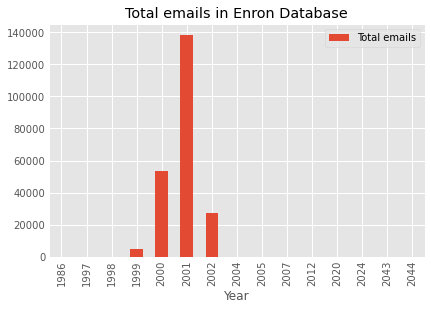

In [264]:
mpl.style.use('ggplot')
plt.figure(figsize=(20,10)) 
stats3.plot.bar(x='Year', y='Total emails', rot=90)
plt.title('Total emails in Enron Database')



<AxesSubplot:title={'center':'Median Content Length per year'}, xlabel='Year'>

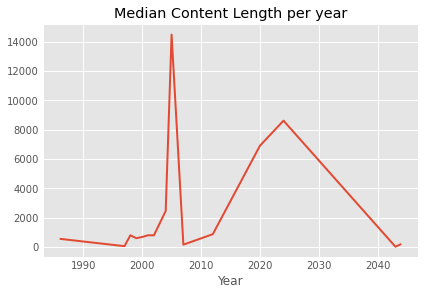

In [265]:
test=df.groupby(['Year'])["Content Length"].median()
test.plot(kind='line',title="Median Content Length per year")


<AxesSubplot:title={'center':'Content Length per Jail Type in 2021'}, xlabel='Jail'>

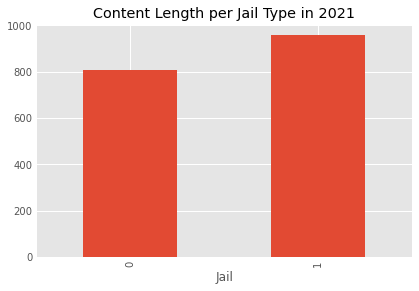

In [266]:
(df[df['Year'] == 2001].groupby(['Jail'])["Content Length"].median()).plot(kind='bar',title="Content Length per Jail Type in 2021")

<AxesSubplot:title={'center':'Content Length per month in 2021'}, xlabel='month'>

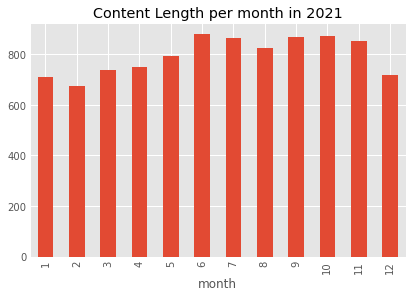

In [267]:
(df[df['Year'] == 2001].groupby(['month'])["Content Length"].median()).plot(kind='bar',title="Content Length per month in 2021")

<AxesSubplot:title={'center':'Median Content Length per Response Type'}, ylabel='Content Length'>

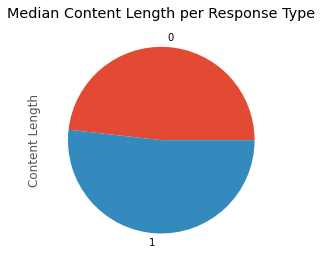

In [268]:
(df.groupby(['Reply'])["Content Length"].median()).plot(kind='pie',title="Median Content Length per Response Type")

<AxesSubplot:title={'center':'Content Length per Jail Type'}, ylabel='Content Length'>

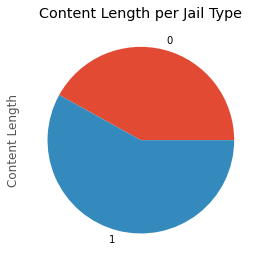

In [269]:
(df.groupby(['Jail'])["Content Length"].median()).plot(kind='pie',title="Content Length per Jail Type")

In [133]:
df.groupby(['Jail'])["Content Length"].median()

Jail
0     774.0
1    1071.0
Name: Content Length, dtype: float64

In [123]:
median= df["Origin"].value_counts().median()

483.0

For distributions that have outliers or are skewed, the median is often the preferred measure of central tendency because the median is more resistant to outliers than the mean.

In [131]:
df["Origin"].mode()

0    DASOVICH-J
dtype: object

In [132]:
df["Origin"].value_counts()[:10].index.tolist()

['DASOVICH-J',
 'Kaminski-V',
 'JONES-T',
 'Taylor-M',
 'SHACKLETON-S',
 'MANN-K',
 'KITCHEN-L',
 'Farmer-D',
 'NEMEC-G',
 'Sanders-R']

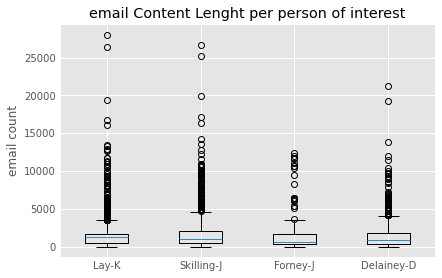

In [270]:
jail=['Lay-K','Skilling-J', 'Forney-J', 'Delainey-D']
emailsj = []
 
for person in jail:
    totemails=df.loc[df["Origin"] == person, "Content Length"]
    emailsj.append(totemails)
  
plt.boxplot(emailsj, labels = jail)
plt.ylabel('email count')
plt.title("email Content Lenght per person of interest")

plt.show()

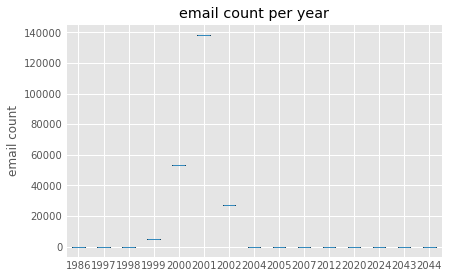

In [271]:
years= np.sort(df['Year'].unique())
totalemailsperyear = []
 
for year in years:
    totemails=stats3.loc[stats3["Year"] == year, "Total emails"]
    totalemailsperyear.append(totemails)
  
plt.boxplot(totalemailsperyear, labels = years)
plt.ylabel('email count')
plt.title("email count per year")

plt.show()